In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

file_path = "data/healthcare_dataset.csv"  
df = pd.read_csv(file_path)

print(df.head())
print(df.info())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer

def load_and_process_data(file_path):
    data = pd.read_csv(file_path)

    categorical_cols = ['Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication']
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

    imputer = SimpleImputer(strategy='mean')  
    data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

    columns_to_drop = [
        'Name', 'Room Number', 'Discharge Date', 'Doctor', 'Gender',
        'Date of Admission', 'Test Results', 'Blood Type', 'Hospital'
    ]
    data = data.drop(columns=columns_to_drop, axis=1)

    return data

file_path = "data/healthcare_dataset.csv" 
df = load_and_process_data(file_path)
df.head()


,Age,Billing Amount,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,30.0,18856.281306,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False
1,62.0,33643.327287,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False
2,76.0,27955.096079,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
3,28.0,37909.782410,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
4,43.0,14238.317814,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True


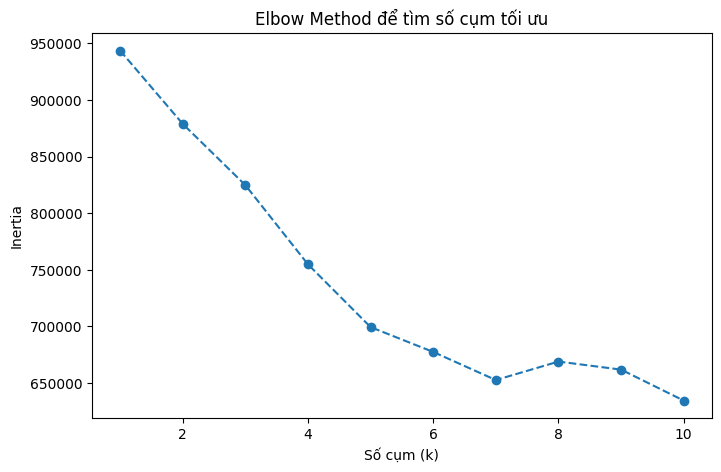

Thông tin cụm:
                Age  Billing Amount  Medical Condition_Asthma  \
Cluster                                                        
0        51.694819    25613.011503                  0.165928   
1        51.351063    25599.426352                  0.109793   
2        51.590896    25473.773742                  0.198839   

         Medical Condition_Cancer  Medical Condition_Diabetes  \
Cluster                                                         
0                        0.163487                    0.168189   
1                        0.111770                    0.445882   
2                        0.200137                    0.000000   

         Medical Condition_Hypertension  Medical Condition_Obesity  \
Cluster                                                              
0                              0.163939                   0.170992   
1                              0.110632                   0.111051   
2                              0.201290                  

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method để tìm số cụm tối ưu')
plt.show()

optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

cluster_summary = df.groupby('Cluster').mean()
print("Thông tin cụm:\n", cluster_summary)

X = df_scaled
y = df['Billing Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Viện phí thực tế và dự đoán cho 10 bệnh nhân đầu tiên:
   Actual Billing Amount  Predicted Billing Amount
0           18856.281306              18856.131482
1           33643.327287              33643.604894
2           27955.096079              27954.826103
3           37909.782410              37909.849768
4           14238.317814              14238.283235
5           48145.110951              48145.110951
6           19580.872345              19579.153447
7           45820.462722              45820.995354
8           50119.222792              50119.222792
9           19784.631062              19784.631062


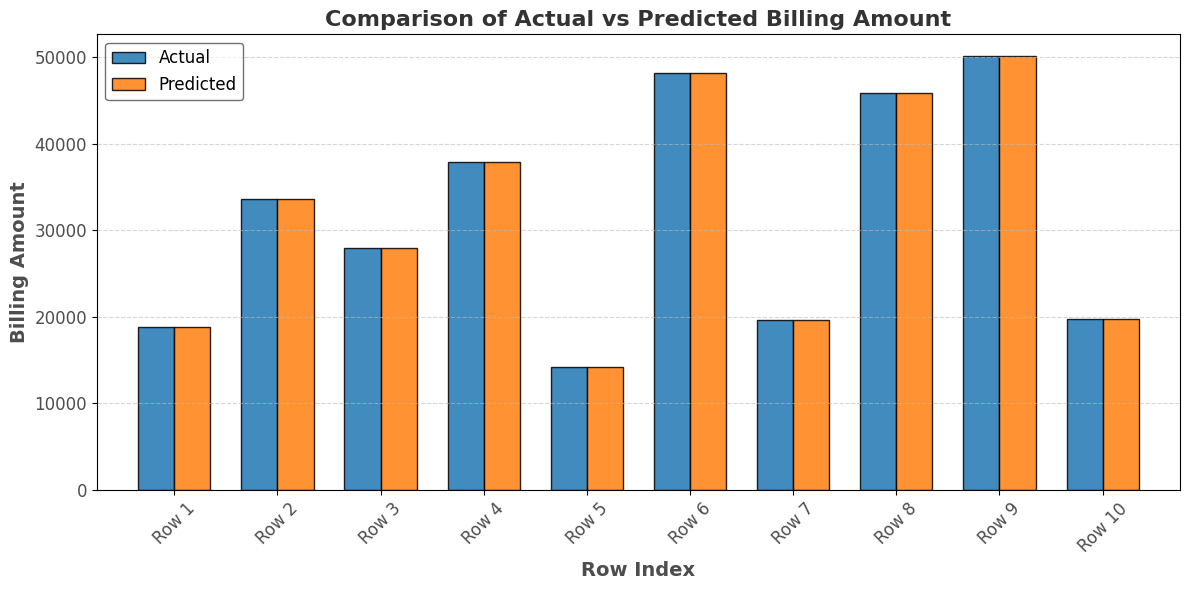

In [7]:
import matplotlib.pyplot as plt
import numpy as np

predictions_for_top_10 = random_search_rf.best_estimator_.predict(X[:10])
results = pd.DataFrame({
    'Actual Billing Amount': y[:10].values,
    'Predicted Billing Amount': predictions_for_top_10
})
print("Viện phí thực tế và dự đoán cho 10 bệnh nhân đầu tiên:")
print(results)

plt.figure(figsize=(12, 6))
x = np.arange(len(results)) 
width = 0.35  
actual_color = '#1f77b4'  
predicted_color = '#ff7f0e' 
plt.bar(
    x - width / 2, results['Actual Billing Amount'], width,
    label='Actual', color=actual_color, edgecolor='black', alpha=0.85
)
plt.bar(
    x + width / 2, results['Predicted Billing Amount'], width,
    label='Predicted', color=predicted_color, edgecolor='black', alpha=0.85
)

plt.xlabel('Row Index', fontsize=14, fontweight='bold', color='#4d4d4d')
plt.ylabel('Billing Amount', fontsize=14, fontweight='bold', color='#4d4d4d')
plt.title(
    'Comparison of Actual vs Predicted Billing Amount',
    fontsize=16, fontweight='bold', color='#333333'
)
plt.xticks(
    x, [f'Row {i + 1}' for i in range(len(results))],
    fontsize=12, rotation=45, color='#4d4d4d'
)
plt.yticks(fontsize=12, color='#4d4d4d')
plt.grid(axis='y', linestyle='--', alpha=0.6, color='#bbbbbb')
plt.gca().set_xlim(-0.75, len(results) - 0.25)
plt.legend(
    loc='upper left', fontsize=12,
    fancybox=True, framealpha=0.7, edgecolor='#333333'
)
plt.tight_layout()
plt.show()

Viện phí thực tế và dự đoán cho 100 bệnh nhân đầu tiên:
    Actual Billing Amount  Predicted Billing Amount
0            18856.281306              18856.131482
1            33643.327287              33643.604894
2            27955.096079              27954.826103
3            37909.782410              37909.849768
4            14238.317814              14238.283235
..                    ...                       ...
95           25503.673807              25503.673807
96            6312.607691               6312.607691
97           21772.341399              21772.341399
98           30437.001788              30437.001788
99           28837.677053              28837.677053

[100 rows x 2 columns]


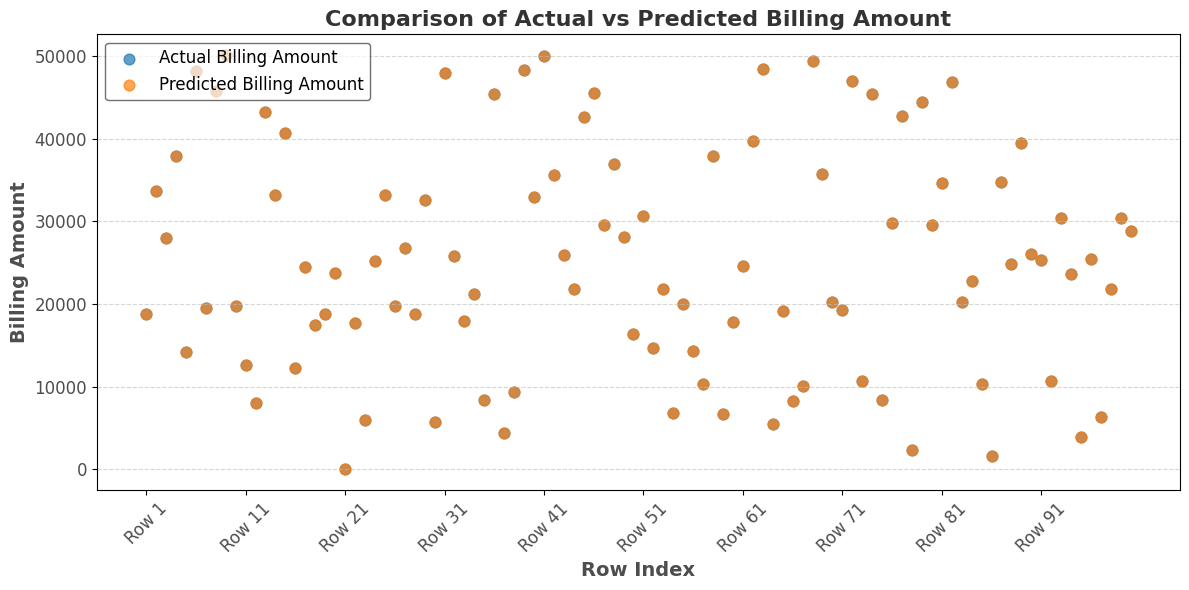

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

predictions_for_top_100 = random_search_rf.best_estimator_.predict(X[:100])

results = pd.DataFrame({
    'Actual Billing Amount': y[:100].values,
    'Predicted Billing Amount': predictions_for_top_100
})

print("Viện phí thực tế và dự đoán cho 100 bệnh nhân đầu tiên:")
print(results)

plt.figure(figsize=(12, 6))

plt.scatter(
    range(len(results)), results['Actual Billing Amount'], 
    label='Actual Billing Amount', color='#1f77b4', alpha=0.7, s=60
)

plt.scatter(
    range(len(results)), results['Predicted Billing Amount'], 
    label='Predicted Billing Amount', color='#ff7f0e', alpha=0.7, s=60
)

plt.xlabel('Row Index', fontsize=14, fontweight='bold', color='#4d4d4d')
plt.ylabel('Billing Amount', fontsize=14, fontweight='bold', color='#4d4d4d')
plt.title(
    'Comparison of Actual vs Predicted Billing Amount',
    fontsize=16, fontweight='bold', color='#333333'
)

plt.xticks(
    range(0, len(results), 10), [f'Row {i+1}' for i in range(0, len(results), 10)], 
    fontsize=12, rotation=45, color='#4d4d4d'
)

plt.yticks(fontsize=12, color='#4d4d4d')

plt.grid(axis='y', linestyle='--', alpha=0.6, color='#bbbbbb')

plt.legend(
    loc='upper left', fontsize=12,
    fancybox=True, framealpha=0.7, edgecolor='#333333'
)

plt.tight_layout()

plt.show()


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

param_dist_rf = {
    'n_estimators': [5],
    'max_depth': [10, 15, 20, None],      
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4],        
    'bootstrap': [True, False]            
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=50,  
    cv=5,      
    scoring='r2',  
    random_state=42,
    n_jobs=-1    
)

random_search_rf.fit(X_train, y_train)

best_params = random_search_rf.best_params_
best_score = random_search_rf.best_score_

print("\nKết quả tối ưu:")
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated R² Score: {best_score:.4f}")

y_pred_rf = random_search_rf.best_estimator_.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest - Mean Absolute Error (MAE):", mae_rf)
print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - R² Score:", r2_rf)



Kết quả tối ưu:
Best Parameters: {'n_estimators': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15, 'bootstrap': False}
Best Cross-Validated R² Score: 1.0000

Random Forest - Mean Absolute Error (MAE): 1.124703643322118
Random Forest - Mean Squared Error (MSE): 7.110455157770138
Random Forest - R² Score: 0.9999999642527938
